In [1]:
import pandas as pd
import numpy as np
import nsepy 
import os
from datetime import datetime ,date
import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

In [2]:
database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"



In [3]:
def getMonthlyExpirtyDate():
    monthly_expirty_Date  =[]
    start_date = datetime.date(2016, 1, 1)
    end_date = datetime.date(2021, 4, 30)
    #delta = datetime.timedelta(days=1)
    delta = relativedelta(months=+1)
    while start_date <= end_date:
        #print(start_date.year,start_date.month)
        #print(str(max(nsepy.get_expiry_date(start_date.year,start_date.month))))
        
        monthly_expirty_Date.append(str(max(nsepy.get_expiry_date(start_date.year,start_date.month))))
        start_date += delta
    return monthly_expirty_Date

In [ ]:
print(os.getcwd())
print(os.listdir())
symbol = 'NIFTY'
banknifty = pd.DataFrame()
formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
month_profit_loss = pd.DataFrame()
start_date = datetime.date(2016, 1, 1)
end_date = datetime.date(2021, 4, 30)
delta = relativedelta(years=+1)
monthly_expirty_date = getMonthlyExpirtyDate()
year_month_list =[]
p_N_L_list =[]
slipage = 5
 
try:
    while start_date <= end_date:
        val =0
        print(str(symbol)+str(start_date.year)+".csv")
        filename = str(symbol)+str(start_date.year)+".csv"
        fname = os.path.join(database,filename)
        fname_day = os.path.join(database,filename)
        df = pd.read_csv(fname)
        df = df.loc[df['SYMBOL']== symbol]
        df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
        df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
        df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
        df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
        formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
        #print(formatted_banknifyt_df)
        # below row is to get only montly expirty date colums from data frame
        formatted_banknifyt_df= formatted_banknifyt_df[ formatted_banknifyt_df['EXPIRY_DT'].isin(monthly_expirty_date)]
        formated_option_df_group = formatted_banknifyt_df.groupby('Year_month')
           
        for name , group in formated_option_df_group :
            #print(name)
            future_logic_df = group[group['INSTRUMENT']=='FUTIDX']
            future_logic_df = future_logic_df.iloc[[0]]
            strike_price = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int).min()
            #print("Strile price is ",strike_price)
            option_df = group[group['INSTRUMENT']=='OPTIDX']
            option_df = option_df[option_df['STRIKE_PR']==strike_price]
            month_option_df_ce = option_df[option_df['OPTION_TYP'].isin(['CE'])]
            month_option_df_pe = option_df[option_df['OPTION_TYP'].isin(['PE'] )]                                                              
            month_option_df_ce = month_option_df_ce.iloc[[0,-1]]
            month_option_df_pe = month_option_df_pe.iloc[[0,-1]]
            month_option_df_ce_buy = month_option_df_ce.iloc[[0]]['OPEN'].min()
            month_option_df_ce_sell =month_option_df_ce.iloc[[-1]]['CLOSE'].min()
            month_option_df_pe_buy = month_option_df_pe.iloc[[0]]['OPEN'].min()
            month_option_df_pe_sell =month_option_df_pe.iloc[[-1]]['CLOSE'].min()
            #print(month_option_df_ce_sell,month_option_df_ce_buy,month_option_df_pe_sell,month_option_df_pe_buy)
            pandl = (month_option_df_ce_sell-month_option_df_ce_buy)+ (month_option_df_pe_sell-month_option_df_pe_buy)
            print("pandl",pandl,abs(pandl*slipage/100))
            pandl = pandl - abs(pandl*slipage/100)
            print("pandl",pandl)
            if p_N_L_list:
                print("inlistelse ",val)
                val = p_N_L_list[-1]        
  
            p_N_L_list.append(val+pandl)
           
            year_month_list.append(name)
           # print( (month_option_df_ce_sell-month_option_df_ce_buy)+ (month_option_df_pe_sell-month_option_df_pe_buy))
        
   
        banknifty= banknifty.append(formatted_banknifyt_df)
        print("r",fname)
        start_date += delta
       
    #print(year_month_list)
    print(p_N_L_list)
    month_profit_loss['Year_month'] = year_month_list
    month_profit_loss['P&L'] = p_N_L_list
    #print(month_profit_loss.head) 
except Exception as error:
    print("File not found {0}".format(error))


C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', '__init__.py']
NIFTY2016.csv
pandl 246.64999999999998 12.3325
pandl 234.31749999999997
pandl 283.8500000000001 14.192500000000004
pandl 269.6575000000001
inlistelse  0
pandl 455.84999999999997 22.7925
pandl 433.05749999999995
inlistelse  234.31749999999997
pandl -116.50000000000001 5.825000000000001
pandl -122.32500000000002
inlistelse  503.975
pandl -4.650000000000006 0.2325000000000003
pandl -4.882500000000006
inlistelse  937.0325
pandl -184.7 9.235
pandl -193.935
inlistelse  814.7075
pandl 87.29999999999997 4.364999999999998
pandl 82.93499999999997
inlistelse  809.8249999999999
pandl -160.7 8.035
pandl -168.73499999999999
inlistelse  615.8899999999999
pandl -24.35000000000001 1.2175000000000005
pandl -25.56750000000001
inlistels

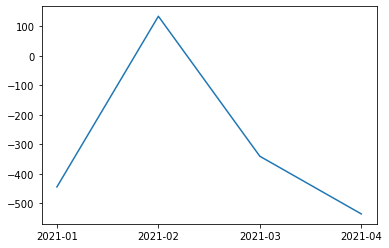

In [9]:
plt.plot(month_profit_loss['Year_month'], month_profit_loss['P&L'])
plt.show()
#print(month_profit_loss)
#print(month_profit_loss.sum())